# House Rate Prediction

A "House Price Prediction" ML model is a machine learning algorithm designed to estimate the selling or rental price of residential properties. By analyzing historical data and relevant features like location, size, amenities, and neighborhood characteristics, the model learns patterns and relationships to make accurate predictions. This helps home buyers, sellers, agents, and investors gain insights into the market value of houses, facilitating informed decision-making in the real estate industry.

## 1. Data Understanding

In [16]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline
import datetime as dt

In [17]:
# Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Reading the dataset
house_df= pd.read_csv('data.csv')

In [19]:
# Inspecting the first 5 rows of the dataframe
house_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2/5/2014,313000,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2/5/2014,2384000,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2/5/2014,342000,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2/5/2014,420000,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2/5/2014,550000,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [20]:
# Shape of dataframe
house_df.shape

(4600, 18)

The number of rows are = 4600

The number of columns are = 18

In [21]:
# Size of dataframe
house_df.size

82800

In [22]:
# Information about the dataset
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   int64  
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [23]:
# Description of dataset
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.990217,563834.701731,0.0,322875.00,460943.50,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.00,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.25,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.00,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.00,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.50,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.00,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.00,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.00,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.00,2300.00,9410.0


## 2. Data Cleaning

In [24]:
# Handling null values
house_df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

- The DataFrame is free of null values, indicating a complete and reliable dataset.

In [25]:
# Handling Outliers
def Detect_Fix_Outliers_IQR(data, col_name):
    if data[col_name].dtype.kind not in 'iufc':  # Skip non-numeric columns
        print(f"Skipping column '{col_name}' as it contains non-numeric data.")
        return

    q3, q1 = data[col_name].quantile(0.75), data[col_name].quantile(0.25)
    high_threshold, low_threshold = q3 + 1.5*(q3 - q1), q1 - 1.5*(q3 - q1)

    outlier_booleans = np.logical_or(
        data[col_name].values > high_threshold,
        data[col_name].values < low_threshold
    )
    num_outliers = np.sum(outlier_booleans)

    print(f"Number of outliers in column '{col_name}': {num_outliers}")
    if num_outliers > 0:
        print("Fixing outliers...")
        
    return data

In [26]:
cols = ['sqft_living', 'yr_built']

for col in cols:
    Detect_Fix_Outliers_IQR(house_df, col)

Number of outliers in column 'sqft_living': 129
Fixing outliers...
Number of outliers in column 'yr_built': 0


- Given the small number of outliers, they can be safely disregarded in the analysis to focus on the majority of the data points and their patterns for building a more accurate model.

In [27]:
# Checking categories available in categorical columns

print(house_df["waterfront"].unique())
print(house_df["view"].unique())
print(house_df["condition"].unique())

[0 1]
[0 4 1 2 3]
[3 5 4 2 1]


In [28]:
## Checking the distribution of categorical data

print(house_df.waterfront.value_counts())
print(house_df.view.value_counts())
print(house_df.condition.value_counts())


waterfront
0    4567
1      33
Name: count, dtype: int64
view
0    4140
2     205
3     116
4      70
1      69
Name: count, dtype: int64
condition
3    2875
4    1252
5     435
2      32
1       6
Name: count, dtype: int64


## 3. Feature Engineering

- Newer houses generally have higher prices compared to older ones, indicating a positive correlation between house age and price due to updated features, modern designs, and better overall condition.
- The number of previous owners is inversely correlated with house price, with fewer owners suggesting better maintenance, fewer issues, and potentially higher value.
- Adding a new 'Age' feature by subtracting the construction year from the current year enhances the dataset, capturing the house's explicit age and enabling comprehensive analysis of its relationship with price.
- House price prediction models can benefit from considering the age of the house, as well as the influence of newer construction and the impact of previous ownership on the property's value.

In [29]:
current_year = dt.datetime.now().year
house_df['Age'] = current_year - house_df['yr_built']

- The 'Country'and 'Date' column are not required for the analysis.

In [30]:
house_df.drop(['country','date'], axis=1, inplace=True)

In [31]:
house_df_dummy = pd.get_dummies(data = house_df) 

In [32]:
house_df_dummy.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000,3,1.50,1340,7912,1.5,0,0,3,1340,...,False,False,False,False,False,False,False,False,False,False
1,2384000,5,2.50,3650,9050,2.0,0,4,5,3370,...,False,False,False,False,False,False,False,False,False,False
2,342000,3,2.00,1930,11947,1.0,0,0,4,1930,...,False,False,False,False,False,False,False,False,False,False
3,420000,3,2.25,2000,8030,1.0,0,0,4,1000,...,False,False,False,False,False,False,False,False,False,False
4,550000,4,2.50,1940,10500,1.0,0,0,4,1140,...,False,False,False,False,False,False,False,False,False,False


In [17]:
house_df_dummy.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,...,-0.042799,-0.023752,-0.064703,0.028291,-0.053016,-0.036461,-0.048083,0.084996,-0.014453,-0.009876
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,...,-0.017946,-0.003511,-0.065610,0.012898,-0.003828,-0.004138,-0.016249,-0.000514,-0.020639,-0.009200
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,...,-0.058020,-0.057286,-0.121614,0.002539,-0.038856,-0.029294,-0.035428,0.021985,-0.016108,-0.010933
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,...,-0.054744,-0.019513,-0.091276,0.035924,-0.037506,-0.019419,-0.030322,0.009033,-0.020760,-0.019151
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,...,-0.020536,-0.001277,-0.014518,-0.005619,-0.017929,-0.006638,-0.012174,-0.033043,0.015086,-0.002733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
statezip_WA 98188,-0.036461,-0.004138,-0.029294,-0.019419,-0.006638,-0.033084,-0.006026,-0.002119,-0.024533,-0.022074,...,-0.009900,-0.008080,-0.008618,-0.007653,-0.007356,1.000000,-0.007870,-0.008683,-0.001811,-0.001478
statezip_WA 98198,-0.048083,-0.016249,-0.035428,-0.030322,-0.012174,-0.048528,0.037542,0.067555,0.004984,-0.034826,...,-0.015504,-0.012654,-0.013496,-0.011985,-0.011519,-0.007870,1.000000,-0.013598,-0.002836,-0.002315
statezip_WA 98199,0.084996,-0.000514,0.021985,0.009033,-0.033043,0.007295,-0.010412,0.068589,0.027351,-0.028688,...,-0.017107,-0.013962,-0.014892,-0.013225,-0.012710,-0.008683,-0.013598,1.000000,-0.003129,-0.002555
statezip_WA 98288,-0.014453,-0.020639,-0.016108,-0.020760,0.015086,0.007338,-0.002172,-0.007899,-0.004467,-0.013945,...,-0.003568,-0.002912,-0.003106,-0.002758,-0.002651,-0.001811,-0.002836,-0.003129,1.000000,-0.000533


In [18]:
house_df_dummy.corr()["price"]

price                1.000000
bedrooms             0.200336
bathrooms            0.327110
sqft_living          0.430410
sqft_lot             0.050451
                       ...   
statezip_WA 98188   -0.036461
statezip_WA 98198   -0.048083
statezip_WA 98199    0.084996
statezip_WA 98288   -0.014453
statezip_WA 98354   -0.009876
Name: price, Length: 4659, dtype: float64

## 4. Data Visualization

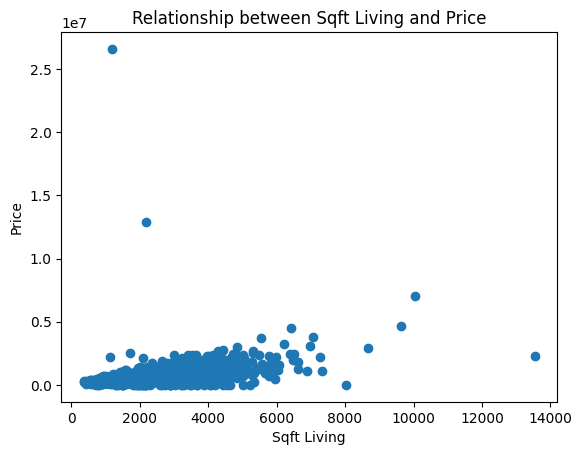

In [33]:
# Scatter plot
plt.scatter(house_df['sqft_living'], house_df['price'])
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.title('Relationship between Sqft Living and Price')
plt.show()

Upon observing the scatter plot, we can discern a positive correlation between the square footage of living space and the price of houses in the 'house_df' DataFrame. The plot reveals a general upward trend, suggesting that as the living area increases, the price tends to rise as well. Additionally, a few outliers can be observed, but they do not appear to significantly disrupt the analysis. The overall data distribution seems relatively well-distributed, indicating a range of prices across different square footage values without any apparent clustering or skewness.

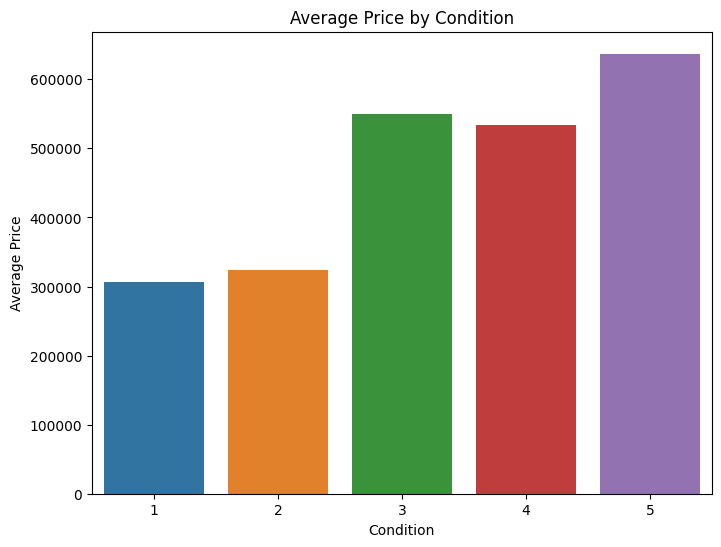

In [34]:
# Calculate average price by condition
avg_price_by_condition = house_df.groupby('condition')['price'].mean().reset_index()

# Bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='condition', y='price', data=avg_price_by_condition)
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.title('Average Price by Condition')
plt.show()


Upon analyzing the bar chart, it becomes evident that there is a direct relationship between the condition of a house and its price. The average prices for houses in condition 4 and 5 are noticeably higher than those in conditions 1 and 2. This observation suggests that as the condition of a house improves, its price tends to increase as well. The disparity in average prices across different condition categories indicates that buyers are willing to pay a premium for houses in better condition, highlighting the significance of house condition in determining market value.

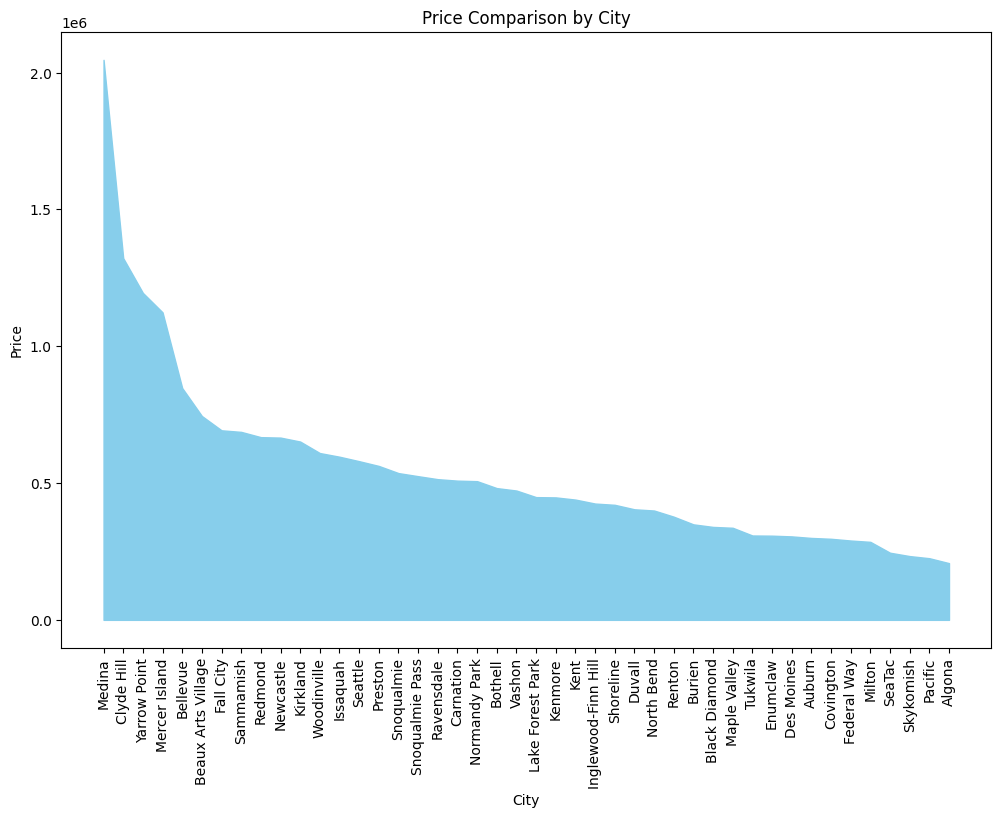

In [35]:
# Selecting the relevant columns
data = house_df[['city', 'price']]

# Grouping the data by city and calculating the average price
grouped_data = data.groupby('city').mean().reset_index()

# Sorting the data by price in descending order
sorted_data = grouped_data.sort_values('price', ascending=False)

# Creating the area chart
plt.figure(figsize=(12, 8))
plt.fill_between(range(len(sorted_data)), sorted_data['price'], color='skyblue')

# Customizing the chart
plt.title('Price Comparison by City')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(range(len(sorted_data)), sorted_data['city'], rotation=90)

# Displaying the chart
plt.show()


Upon observing the generated area chart, it becomes evident that certain cities exhibit high average prices, while others have comparatively lower prices. This disparity suggests that factors such as the cost of living, demand, or specific characteristics contribute to the variations in property prices among different cities. The larger filled areas represent cities with higher average prices, indicating a higher cost of living or stronger demand. Conversely, cities with smaller filled areas offer relatively more affordable housing options. Additionally, the ascending order of cities on the x-axis allows for a clear understanding of the relative positioning of cities in terms of average prices, providing insights into the price distribution across different locations.

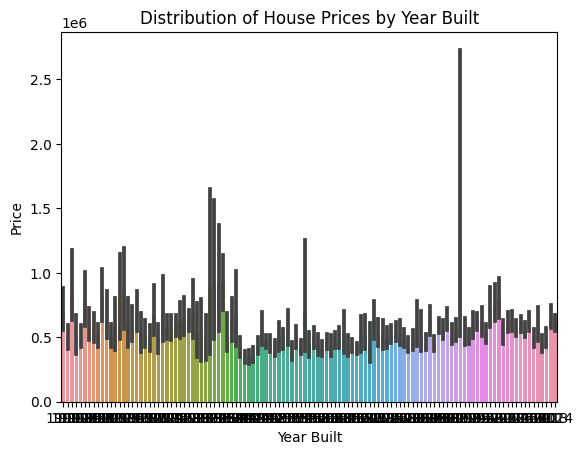

In [36]:
# Calculate average price by year
average_price_by_year = house_df.groupby('yr_built')['price'].mean()

# Box plot
sns.barplot(data=house_df, x='yr_built', y='price')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.title('Distribution of House Prices by Year Built')
plt.show()

Upon closer examination of the box plot, it appears that there is no specific trend over time regarding house prices. This suggests that factors beyond the construction year, such as location, house area, and renovations, may have a more significant influence on house prices. The presence of a few outliers can be considered as exceptions and doesn't significantly disrupt the overall analysis. It appears that the distribution of house prices remains relatively similar across different years, indicating a relatively stable pricing pattern. Thus, while the construction year may have some impact, it is not the sole determinant of house prices, with other factors playing a more crucial role in influencing pricing variations.

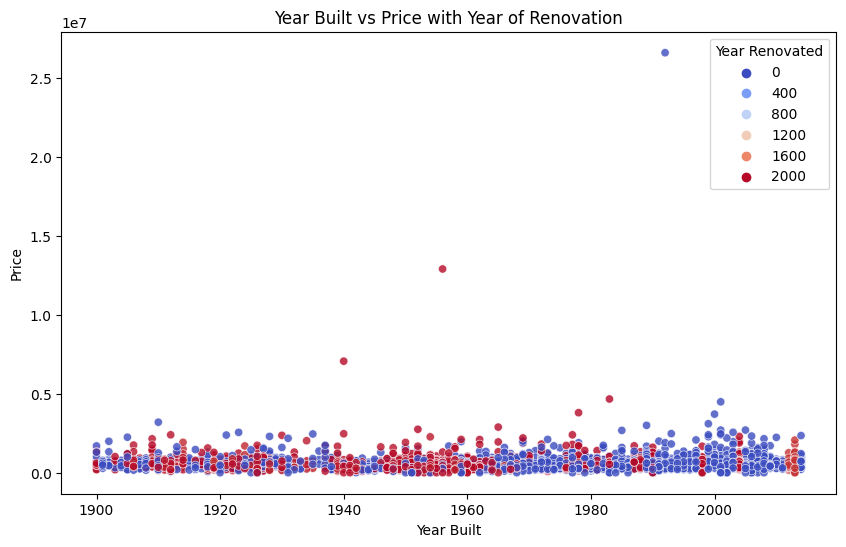

In [37]:
# Scatter plot with color encoding
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=house_df, x='yr_built', y='price', hue='yr_renovated', palette='coolwarm', alpha=0.8)
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.title('Year Built vs Price with Year of Renovation')
plt.legend(title='Year Renovated', bbox_to_anchor=(1, 1))
plt.show()


The scatter plot analysis does not reveal any clear pattern or trend between the year a house was built and its corresponding price. The color encoding of data points representing the year of renovation shows that newer houses tend to have fewer renovations. Additionally, a larger number of unrenovated houses can be observed among newer constructions, depicted by the prevalence of blue-colored data points on the right-hand side of the graph. This suggests that factors such as house size, locality, and other unique characteristics may have a more significant influence on house prices than the year of construction or renovation alone.

## 5. Data Preprocessing 

In [38]:
house_df_dummy.mean()

price                551962.990217
bedrooms                  3.400870
bathrooms                 2.160815
sqft_living            2139.346957
sqft_lot              14852.516087
                         ...      
statezip_WA 98188         0.005000
statezip_WA 98198         0.012174
statezip_WA 98199         0.014783
statezip_WA 98288         0.000652
statezip_WA 98354         0.000435
Length: 4660, dtype: float64

In [39]:
house_df_dummy.std()

price                563834.701731
bedrooms                  0.908848
bathrooms                 0.783781
sqft_living             963.206916
sqft_lot              35884.436145
                         ...      
statezip_WA 98188         0.070541
statezip_WA 98198         0.109674
statezip_WA 98199         0.120695
statezip_WA 98288         0.025532
statezip_WA 98354         0.020849
Length: 4660, dtype: float64

In [40]:
# Selecting the columns 'Bedrooms' to 'Statezip' from the DataFrame 'car_price_dummy'
house_df_dummy_original = house_df_dummy.loc[:, 'bedrooms':'statezip_WA 98354']

# Displaying the head of the modified DataFrame
house_df_dummy_original.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,3,1.50,1340,7912,1.5,0,0,3,1340,0,...,False,False,False,False,False,False,False,False,False,False
1,5,2.50,3650,9050,2.0,0,4,5,3370,280,...,False,False,False,False,False,False,False,False,False,False
2,3,2.00,1930,11947,1.0,0,0,4,1930,0,...,False,False,False,False,False,False,False,False,False,False
3,3,2.25,2000,8030,1.0,0,0,4,1000,1000,...,False,False,False,False,False,False,False,False,False,False
4,4,2.50,1940,10500,1.0,0,0,4,1140,800,...,False,False,False,False,False,False,False,False,False,False


In [41]:
print(house_df_dummy.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above',
       ...
       'statezip_WA 98155', 'statezip_WA 98166', 'statezip_WA 98168',
       'statezip_WA 98177', 'statezip_WA 98178', 'statezip_WA 98188',
       'statezip_WA 98198', 'statezip_WA 98199', 'statezip_WA 98288',
       'statezip_WA 98354'],
      dtype='object', length=4660)


In [42]:
# Selecting the columns from 'bedrooms' to the end of the DataFrame 'house_df_dummy'
house_df_dummy_trans = house_df_dummy.loc[:, 'price':]

# Displaying the head of the modified DataFrame
house_df_dummy_trans.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98155,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354
0,313000,3,1.50,1340,7912,1.5,0,0,3,1340,...,False,False,False,False,False,False,False,False,False,False
1,2384000,5,2.50,3650,9050,2.0,0,4,5,3370,...,False,False,False,False,False,False,False,False,False,False
2,342000,3,2.00,1930,11947,1.0,0,0,4,1930,...,False,False,False,False,False,False,False,False,False,False
3,420000,3,2.25,2000,8030,1.0,0,0,4,1000,...,False,False,False,False,False,False,False,False,False,False
4,550000,4,2.50,1940,10500,1.0,0,0,4,1140,...,False,False,False,False,False,False,False,False,False,False


## 6. Model Training and Evaluation

In [43]:
# Splitting the data into features (X) and target variable (y)
X = house_df_dummy_trans.drop('price', axis=1)
y = house_df_dummy_trans['price']

In [44]:
# Importing the necessary module for train-test split
from sklearn.model_selection import train_test_split

In [45]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Printing the shape of the training and testing sets
print("x train: ", X_train.shape)
print("x test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (3680, 4659)
x test:  (920, 4659)
y train:  (3680,)
y test:  (920,)


In [46]:
# Importing the necessary modules and classes from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Linear Regression
linear_model = LinearRegression()

# Random Forest 
random_forest_model = RandomForestRegressor()


In [47]:
def house_pred_model(model, X_train, X_test, y_train, y_test):
    # Training model
    model.fit(X_train, y_train)

    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train, y_pred_train)
    R2_train = round(R2_train_model, 2)

    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test, y_pred_test)
    R2_test = round(R2_test_model, 2)

    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model, X_train, y_train, cv=5)
    cv_mean = cross_val.mean()
    CV = round(cv_mean, 2)

    return R2_train, R2_test, cross_val, CV, y_pred_train, y_pred_test


In [48]:
# Printing results

def print_result(score_train, score_test, cv_list, cv_mean):
    print("Train R2-score:", score_train)
    print("Test R2-score:", score_test)
    print("Train CV scores:", cv_list)
    print("Train CV mean:", cv_mean)

In [49]:
# Plotting Graph

def plot_graph(y_train_prediction, y_test_prediction):
    fig, axes = plt.subplots(2, 1, figsize=(10, 10))

    # Train values plot
    axes[0].plot(range(len(y_train_prediction)), y_train_prediction, label='Predicted Train Values', color='green')
    axes[0].set_title('Predicted Train Values vs Actual Train Values')
    axes[0].set_xlabel('Data Point')
    axes[0].set_ylabel('Price')
    axes[0].legend()

    # Test values plot
    axes[1].scatter(y_test_prediction, y_test_prediction, color='red')
    axes[1].plot([min(y_test_prediction), max(y_test_prediction)], [min(y_test_prediction), max(y_test_prediction)], color='blue', linestyle='--')
    axes[1].set_title('Predicted Test Values vs Actual Test Values')
    axes[1].set_xlabel('Actual Test Values')
    axes[1].set_ylabel('Predicted Test Values')

    plt.tight_layout()
    plt.show()

### 1 - Linear Regression

In [50]:
lr = LinearRegression()

In [57]:
# Training and evaluating the model
r2_score_train_lr, r2_score_test_lr, crossval_list_lr, CVmean_lr, y_pred_train_values_lr, y_pred_test_values_lr = house_pred_model(lr, X_train, X_test, y_train, y_test)

In [58]:
print("Linear Regression Results:")
print_result(r2_score_train_lr, r2_score_test_lr, crossval_list_lr, CVmean_lr)
print('Mean square error:', mean_squared_error(y_test, y_pred_test_values_lr))

Linear Regression Results:
Train R2-score: 1.0
Test R2-score: -56.37
Train CV scores: [ 5.19978315e-01 -5.68855917e+00 -6.10292145e+05 -3.99843147e+01
 -5.80508436e+01]
Train CV mean: -122079.07
Mean square error: 6996022098904.191


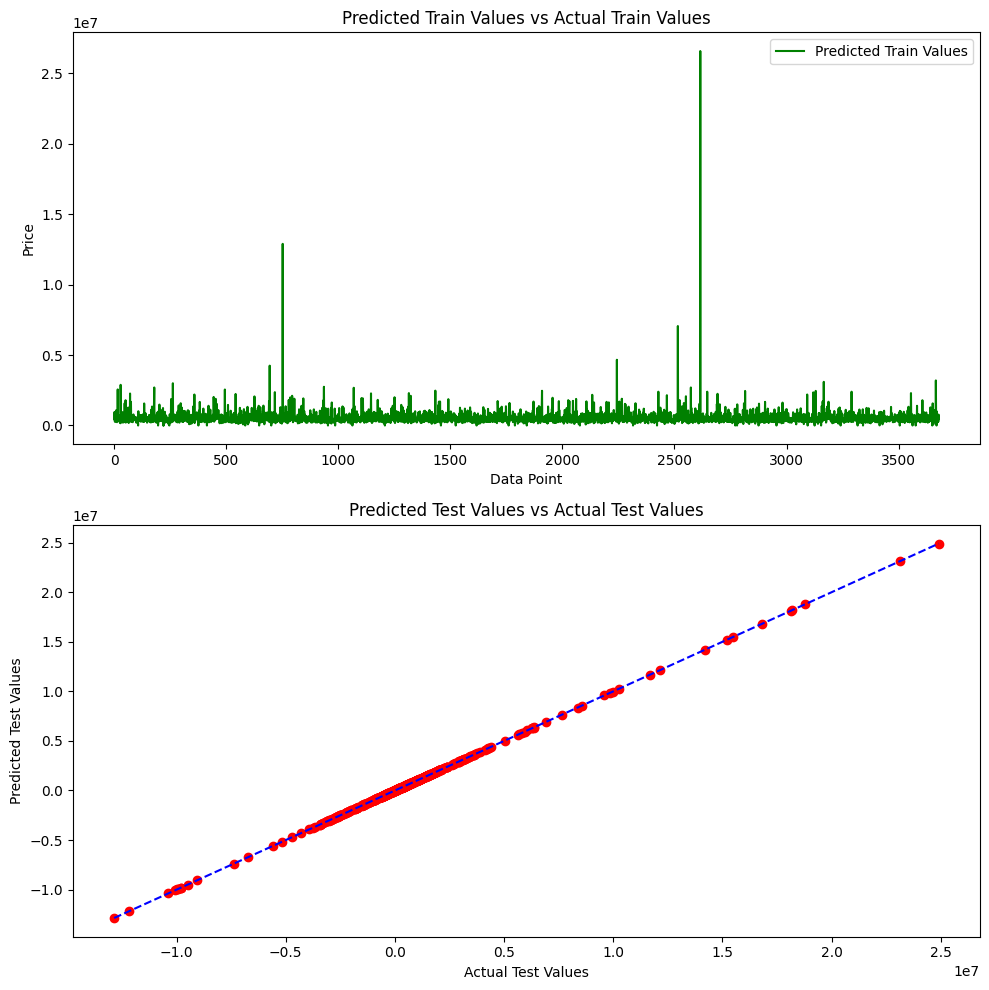

In [59]:
plot_graph(y_pred_train_values_lr, y_pred_test_values_lr)

### 2 - Random Forest

In [67]:
rf = RandomForestRegressor()

# Number of trees in Random Forest
n_estimators = list(range(500, 1000, 100))

# Maximum number of levels in a tree
max_depth = list(range(4, 9, 4))

# Minimum number of samples required to split an internal node
min_samples_split = list(range(4, 9, 2))

# Minimum number of samples required to be at a leaf node
min_samples_leaf = [1, 2, 5, 7]

# Number of features to be considered at each split
max_features = ['sqrt']

# Hyperparameters dict
param_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "max_features": max_features
}

# RandomizedSearchCV
rf_rs = RandomizedSearchCV(estimator=rf, param_distributions=param_grid)

In [69]:
# Training and evaluating the model
r2_train_rf, r2_test_rf, cv_scores_rf, cv_mean_rf, y_pred_train_rf, y_pred_test_rf = house_pred_model(rf_rs, X_train, X_test, y_train, y_test)

In [70]:
# Printing the results
print("Random Forest Model with RandomizedSearchCV:")
print("Train R2-score:", r2_train_rf)
print("Test R2-score:", r2_test_rf)
print("Cross-validation scores:", cv_scores_rf)
print("Mean CV score:", cv_mean_rf)

Random Forest Model with RandomizedSearchCV:
Train R2-score: 0.33
Test R2-score: 0.02
Cross-validation scores: [0.21084267 0.27088144 0.25220824 0.23049301 0.19361936]
Mean CV score: 0.23


In [72]:
def plot_graph(y_train_prediction, y_test_prediction):
    fig, axes = plt.subplots(2, 1, figsize=(10, 10))
    
    # Train values plot
    axes[0].plot(range(len(y_train)), y_train, label='Actual Train Values', color='blue')
    axes[0].plot(range(len(y_train)), y_train_prediction, label='Predicted Train Values', color='green')
    axes[0].set_title('Predicted Train Values vs Actual Train Values')
    axes[0].set_xlabel('Data Point')
    axes[0].set_ylabel('Price')
    axes[0].legend()
    
    # Test values plot
    axes[1].scatter(y_test, y_test_prediction, color='red')
    axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--')
    axes[1].set_title('Predicted Test Values vs Actual Test Values')
    axes[1].set_xlabel('Actual Test Values')
    axes[1].set_ylabel('Predicted Test Values')
    
    plt.tight_layout()
    plt.show()

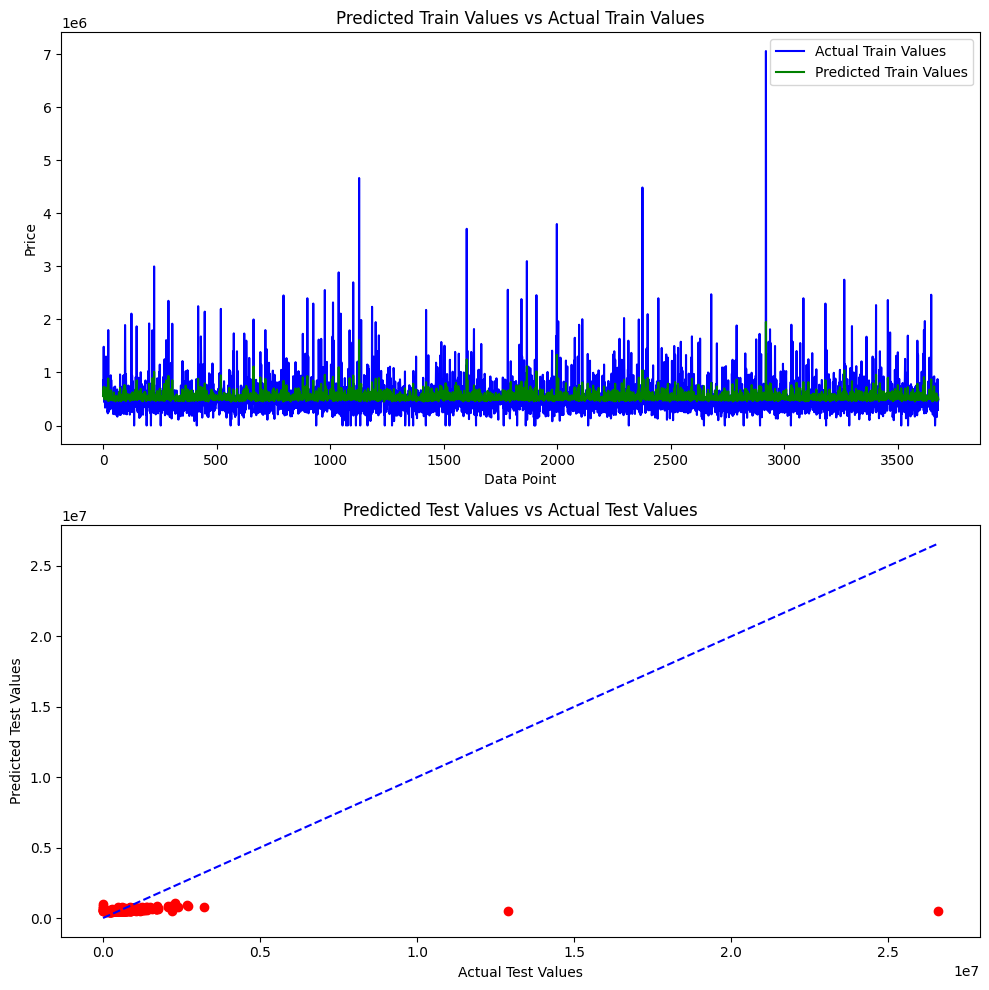

In [73]:
plot_graph(y_pred_train_rf, y_pred_test_rf)

## 7. Model Optimization

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
# Create your models
lr = LinearRegression()
rf = RandomForestRegressor()

# Perform cross-validation for Linear Regression
lr_cv_scores = cross_val_score(lr, X, y, cv=5)
lr_cv_mean = lr_cv_scores.mean()

# Perform cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf, X, y, cv=5)
rf_cv_mean = rf_cv_scores.mean()

In [40]:
# Print the cross-validation scores and means
print("Linear Regression Cross-Validation Scores:", lr_cv_scores)
print("Linear Regression Mean Cross-Validation Score:", lr_cv_mean)
print()

print()
print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Random Forest Mean Cross-Validation Score:", rf_cv_mean)

Linear Regression Cross-Validation Scores: [-55.90380794 -43.78237281 -28.79518769   0.48555486 -16.97928495]
Linear Regression Mean Cross-Validation Score: -28.995019706656723


Random Forest Cross-Validation Scores: [0.73096697 0.72082935 0.66284907 0.71679723 0.03237988]
Random Forest Mean Cross-Validation Score: 0.5727644986632011


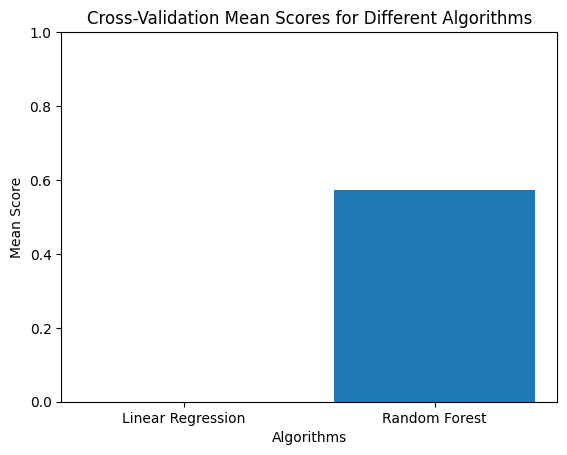

In [42]:
# Cross-validation means
cv_means = [lr_cv_mean, rf_cv_mean]

# Algorithm names
algorithms = ['Linear Regression', 'Random Forest']

# Plotting the bar chart
plt.bar(algorithms, cv_means)
plt.title('Cross-Validation Mean Scores for Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Mean Score')
plt.ylim([0, 1])  # Set the y-axis limits if needed
plt.show()

### The cross-validation results indicate that the Random Forest algorithm outperforms Linear Regression on the given dataset, with a higher mean cross-validation score of 0.57 compared to -29.

In [51]:
# Serialize and save the trained model as a .pkl file for future use

import pickle
from sklearn.ensemble import RandomForestRegressor

In [52]:
# Assuming you have trained and instantiated the random forest model before saving it
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [53]:
# Save the trained model using pickle
with open('House_Price_Prediction.pkl', 'wb') as file:
    pickle.dump(model, file)